In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [2]:
# Define date range
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)


In [3]:
# Define stock symbol
stock = "GOOG"


In [ ]:
# Download data
google_data = yf.download(stock, start=start, end=end)
print("Available columns:", google_data.columns)  # Debugging step


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Available columns: MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


In [5]:
# Ensure 'Close' column exists
if 'Close' in google_data.columns:
    google_data['Adj Close'] = google_data['Close']
else:
    raise KeyError("Column 'Close' not found. Available columns: " + str(google_data.columns))

In [6]:
# Data exploration
print(google_data.head())
print(google_data.shape)
print(google_data.describe())
print(google_data.info())
print(google_data.isna().sum())

Price          Close      High       Low      Open     Volume Adj Close
Ticker          GOOG      GOOG      GOOG      GOOG       GOOG          
Date                                                                   
2005-03-30  4.473217  4.498006  4.452146  4.477926  250378977  4.473217
2005-03-31  4.474704  4.496519  4.403559  4.411244  271758815  4.474704
2005-04-01  4.463053  4.535189  4.461814  4.505691  248206866  4.463053
2005-04-04  4.593196  4.593940  4.458095  4.460823  324266893  4.593196
2005-04-05  4.674506  4.716399  4.649716  4.653682  350777892  4.674506
(5033, 6)
Price         Close         High          Low         Open        Volume  \
Ticker         GOOG         GOOG         GOOG         GOOG          GOOG   
count   5033.000000  5033.000000  5033.000000  5033.000000  5.033000e+03   
mean      50.596809    51.113207    50.068230    50.578235  1.037719e+08   
std       48.394330    48.910154    47.882324    48.371558  1.343068e+08   
min        4.463053     4.496519  

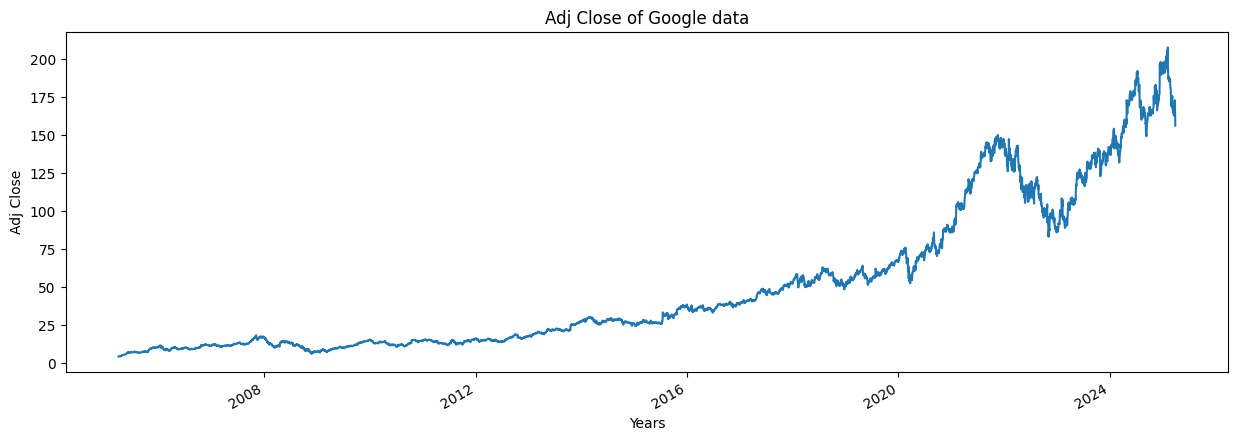

In [7]:
# Plot Closing Price
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()

plot_graph((15, 5), google_data['Adj Close'], 'Adj Close')


<Figure size 1500x500 with 0 Axes>

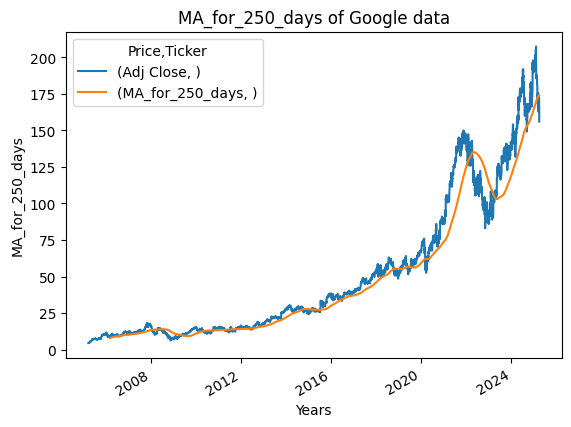

<Figure size 1500x500 with 0 Axes>

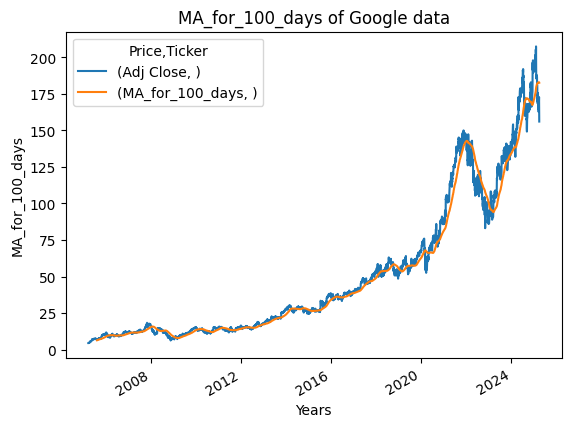

<Figure size 1500x500 with 0 Axes>

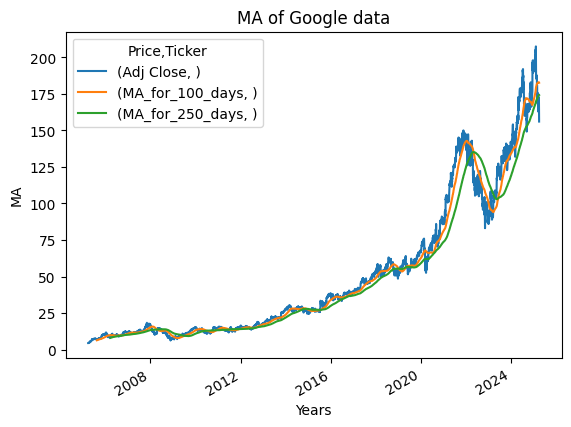

In [8]:
# Moving Averages
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')


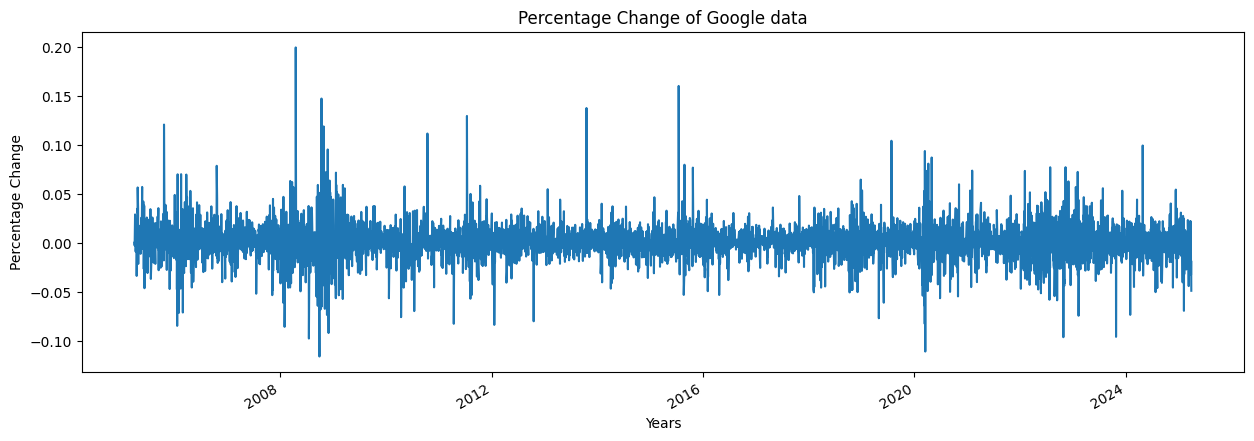

In [9]:
# Percentage Change
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
plot_graph((15, 5), google_data['percentage_change_cp'], 'Percentage Change')

In [10]:
# Scaling Data
scaler = MinMaxScaler(feature_range=(0, 1))
Adj_close_price = google_data[['Adj Close']]
scaled_data = scaler.fit_transform(Adj_close_price)


In [11]:
# Preparing Training & Testing Data
x_data, y_data = [], []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i - 100:i])
    y_data.append(scaled_data[i])


In [12]:
x_data, y_data = np.array(x_data), np.array(y_data)
splitting_len = int(len(x_data) * 0.7)

In [31]:
x_train, y_train = x_data[:splitting_len], y_data[:splitting_len]
x_test, y_test = x_data[splitting_len:], y_data[splitting_len:]

C:\Users\Shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile & Train Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)


Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 102s 29ms/step - loss: 2.5361e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 99s 29ms/step - loss: 5.5305e-05


In [16]:
# Make Predictions
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


In [17]:
# RMSE Calculation
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print("RMSE:", rmse)

RMSE: 9.270830299057224


<Figure size 1500x600 with 0 Axes>

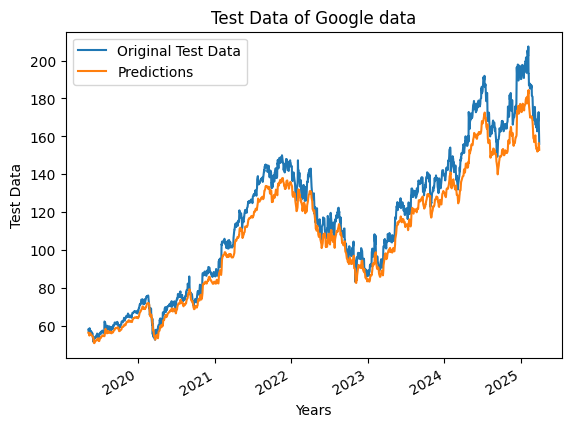

In [18]:
# Plot Predictions
ploting_data = pd.DataFrame({
    'Original Test Data': inv_y_test.reshape(-1),
    'Predictions': inv_predictions.reshape(-1)
}, index=google_data.index[splitting_len + 100:])
plot_graph((15, 6), ploting_data, 'Test Data')


In [1]:
# Save Model
model.save("Latest_stock_price_model.keras")

NameError: name 'model' is not defined